In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import plotly.express as px
import pingouin as pg

from scikit_posthocs import posthoc_dunn

In [3]:
df = pd.read_csv(r'C:\Users\Игорь\Desktop\hospitals\hospitals.csv')

In [4]:
df.head()

,hospital_name,city,state,county_name,hospital_type,hospital_ownership,emergency_services,beds,trauma,mortality_national_comparison,rating
0,CRESTWOOD MEDICAL CENTER,HUNTSVILLE,AL,MADISON,Acute Care Hospitals,Proprietary,True,147,LEVEL III,Below the National average,3.0
1,PROVIDENCE ALASKA MEDICAL CENTER,ANCHORAGE,AK,ANCHORAGE,Acute Care Hospitals,Voluntary non-profit - Church,True,371,LEVEL II,Same as the National average,3.0
2,NEWPORT HOSPITAL,NEWPORT,RI,NEWPORT,Acute Care Hospitals,Voluntary non-profit - Private,True,129,NOT AVAILABLE,Above the National average,4.0
3,CHICOT MEMORIAL MEDICAL CENTER,LAKE VILLAGE,AR,CHICOT,Critical Access Hospitals,Voluntary non-profit - Private,True,25,LEVEL IV,Same as the National average,3.0
4,SAN GORGONIO MEMORIAL HOSPITAL,BANNING,CA,RIVERSIDE,Acute Care Hospitals,Government - Hospital District or Authority,True,71,NOT AVAILABLE,Same as the National average,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_name                  2884 non-null   object 
 1   city                           2884 non-null   object 
 2   state                          2884 non-null   object 
 3   county_name                    2881 non-null   object 
 4   hospital_type                  2884 non-null   object 
 5   hospital_ownership             2884 non-null   object 
 6   emergency_services             2884 non-null   bool   
 7   beds                           2884 non-null   int64  
 8   trauma                         2884 non-null   object 
 9   mortality_national_comparison  2884 non-null   object 
 10  rating                         2884 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 228.3+ KB


In [6]:
df.duplicated(subset = 'hospital_name').sum()

np.int64(653)

In [16]:
df[df.duplicated(subset = 'hospital_name', keep=False)]


,hospital_name,city,state,county_name,hospital_type,hospital_ownership,emergency_services,beds,trauma,mortality_national_comparison,rating
11,ST FRANCIS HOSPITAL,WILMINGTON,DE,NEW CASTLE,Acute Care Hospitals,Voluntary non-profit - Private,True,25,NOT AVAILABLE,Same as the National average,4.0
12,ST FRANCIS HOSPITAL,WILMINGTON,DE,NEW CASTLE,Acute Care Hospitals,Voluntary non-profit - Private,True,376,NOT AVAILABLE,Same as the National average,4.0
13,ST FRANCIS HOSPITAL,WILMINGTON,DE,NEW CASTLE,Acute Care Hospitals,Voluntary non-profit - Private,True,142,NOT AVAILABLE,Same as the National average,4.0
28,SAINT JOSEPH HOSPITAL,LEXINGTON,KY,FAYETTE,Acute Care Hospitals,Voluntary non-profit - Church,True,369,LEVEL IV,Same as the National average,2.0
29,SAINT JOSEPH HOSPITAL,LEXINGTON,KY,FAYETTE,Acute Care Hospitals,Voluntary non-profit - Church,True,112,NOT AVAILABLE,Same as the National average,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2860,MEMORIAL HOSPITAL,DUMAS,TX,MOORE,Acute Care Hospitals,Government - Hospital District or Authority,True,83,NOT AVAILABLE,Same as the National average,4.0
2861,MEMORIAL HOSPITAL,DUMAS,TX,MOORE,Acute Care Hospitals,Government - Hospital District or Authority,True,25,LEVEL IV,Same as the National average,4.0
2863,MEMORIAL HOSPITAL,DUMAS,TX,MOORE,Acute Care Hospitals,Government - Hospital District or Authority,True,34,NOT AVAILABLE,Same as the National average,4.0
2875,AURORA MEDICAL CENTER,SUMMIT,WI,WAUKESHA,Acute Care Hospitals,Voluntary non-profit - Private,True,127,LEVEL III,Same as the National average,4.0


In [18]:
df_clear = df.drop_duplicates(subset = 'hospital_name')

In [19]:
df_clear

,hospital_name,city,state,county_name,hospital_type,hospital_ownership,emergency_services,beds,trauma,mortality_national_comparison,rating
0,CRESTWOOD MEDICAL CENTER,HUNTSVILLE,AL,MADISON,Acute Care Hospitals,Proprietary,True,147,LEVEL III,Below the National average,3.0
1,PROVIDENCE ALASKA MEDICAL CENTER,ANCHORAGE,AK,ANCHORAGE,Acute Care Hospitals,Voluntary non-profit - Church,True,371,LEVEL II,Same as the National average,3.0
2,NEWPORT HOSPITAL,NEWPORT,RI,NEWPORT,Acute Care Hospitals,Voluntary non-profit - Private,True,129,NOT AVAILABLE,Above the National average,4.0
3,CHICOT MEMORIAL MEDICAL CENTER,LAKE VILLAGE,AR,CHICOT,Critical Access Hospitals,Voluntary non-profit - Private,True,25,LEVEL IV,Same as the National average,3.0
4,SAN GORGONIO MEMORIAL HOSPITAL,BANNING,CA,RIVERSIDE,Acute Care Hospitals,Government - Hospital District or Authority,True,71,NOT AVAILABLE,Same as the National average,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2878,BERKELEY MEDICAL CENTER,MARTINSBURG,WV,BERKELEY,Acute Care Hospitals,Voluntary non-profit - Other,True,195,LEVEL III,Same as the National average,3.0
2879,ROUND ROCK MEDICAL CENTER,ROUND ROCK,TX,WILLIAMSON,Acute Care Hospitals,Voluntary non-profit - Other,True,173,LEVEL II,Same as the National average,4.0
2881,AURORA LAKELAND MEDICAL CENTER,ELKHORN,WI,WALWORTH,Acute Care Hospitals,Voluntary non-profit - Private,True,109,LEVEL III,Same as the National average,4.0
2882,KITTITAS VALLEY COMMUNITY HOSPITAL,ELLENSBURG,WA,KITTITAS,Critical Access Hospitals,Government - Hospital District or Authority,True,25,LEVEL IV,Same as the National average,3.0


In [55]:
df_clear['owner'] = df_clear.hospital_ownership.str.split().str[0]

C:\Users\Игорь\AppData\Local\Temp\ipykernel_1704\2653319981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['owner'] = df_clear.hospital_ownership.str.split().str[0]


In [56]:
df_clear

,hospital_name,city,state,county_name,hospital_type,hospital_ownership,emergency_services,beds,trauma,mortality_national_comparison,rating,owner
0,CRESTWOOD MEDICAL CENTER,HUNTSVILLE,AL,MADISON,Acute Care Hospitals,Proprietary,True,147,LEVEL III,Below the National average,3.0,Proprietary
1,PROVIDENCE ALASKA MEDICAL CENTER,ANCHORAGE,AK,ANCHORAGE,Acute Care Hospitals,Voluntary non-profit - Church,True,371,LEVEL II,Same as the National average,3.0,Voluntary
2,NEWPORT HOSPITAL,NEWPORT,RI,NEWPORT,Acute Care Hospitals,Voluntary non-profit - Private,True,129,NOT AVAILABLE,Above the National average,4.0,Voluntary
3,CHICOT MEMORIAL MEDICAL CENTER,LAKE VILLAGE,AR,CHICOT,Critical Access Hospitals,Voluntary non-profit - Private,True,25,LEVEL IV,Same as the National average,3.0,Voluntary
4,SAN GORGONIO MEMORIAL HOSPITAL,BANNING,CA,RIVERSIDE,Acute Care Hospitals,Government - Hospital District or Authority,True,71,NOT AVAILABLE,Same as the National average,3.0,Government
...,...,...,...,...,...,...,...,...,...,...,...,...
2878,BERKELEY MEDICAL CENTER,MARTINSBURG,WV,BERKELEY,Acute Care Hospitals,Voluntary non-profit - Other,True,195,LEVEL III,Same as the National average,3.0,Voluntary
2879,ROUND ROCK MEDICAL CENTER,ROUND ROCK,TX,WILLIAMSON,Acute Care Hospitals,Voluntary non-profit - Other,True,173,LEVEL II,Same as the National average,4.0,Voluntary
2881,AURORA LAKELAND MEDICAL CENTER,ELKHORN,WI,WALWORTH,Acute Care Hospitals,Voluntary non-profit - Private,True,109,LEVEL III,Same as the National average,4.0,Voluntary
2882,KITTITAS VALLEY COMMUNITY HOSPITAL,ELLENSBURG,WA,KITTITAS,Critical Access Hospitals,Government - Hospital District or Authority,True,25,LEVEL IV,Same as the National average,3.0,Government


In [72]:
df_clear.groupby('owner').rating.agg(['mean', 'count', 'std', 'median']).sort_values(by = 'mean', ascending = False)

,mean,count,std,median
owner,,,,
Physician,4.222222,18,1.060275,5.0
Voluntary,3.157736,1325,0.789868,3.0
Government,2.970115,435,0.780835,3.0
Proprietary,2.913717,452,0.854926,3.0
Tribal,2.000000,1,NaN,2.0


<Axes: xlabel='rating', ylabel='owner'>

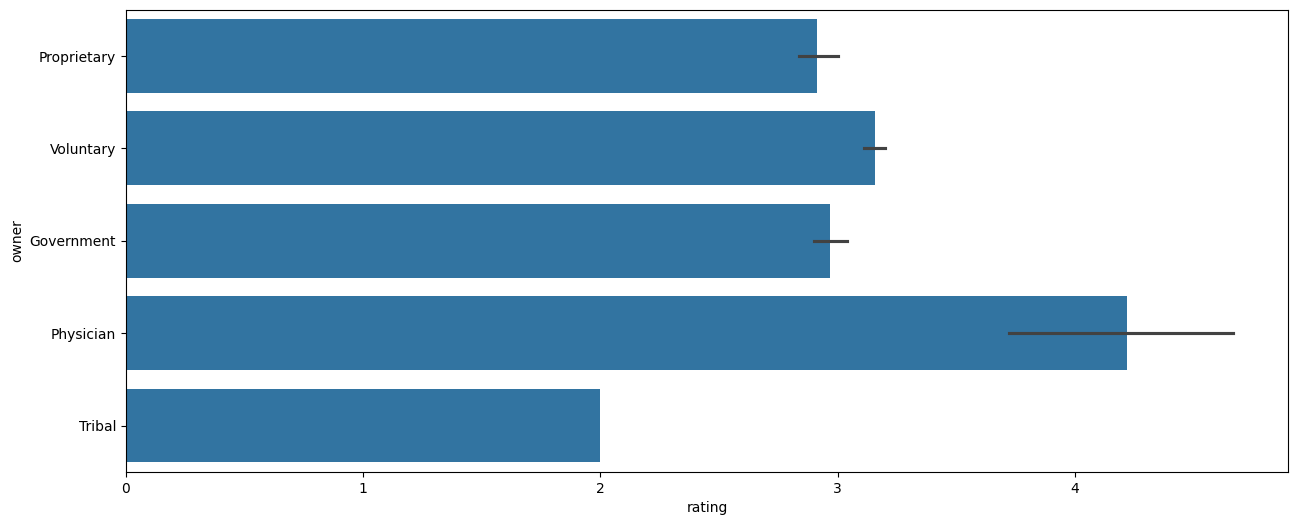

In [111]:
plt.figure(figsize=(15, 6))
sns.barplot(data = df_clear, y = 'owner', x = 'rating')

In [129]:
st.shapiro(df_clear.rating)

ShapiroResult(statistic=np.float64(0.871108508632033), pvalue=np.float64(1.6777170258057906e-39))

In [130]:
#проведем анализ с оговоркой, что у Physician-больниц маленькая выборка (n = 18)
st.kruskal(
    df_clear[df_clear['owner'] == 'Physician']['rating'],
    df_clear[df_clear['owner'] == 'Voluntary']['rating'],
    df_clear[df_clear['owner'] == 'Government']['rating'],
    df_clear[df_clear['owner'] == 'Proprietary']['rating']
)

KruskalResult(statistic=np.float64(65.34603579158546), pvalue=np.float64(4.229978252088878e-14))

In [ ]:
#pvalue < 0.05 - различия статистически значимые. Тип владельца влияет на рейтинг больницы

In [76]:
posthoc_dunn(df_clear, val_col='rating', group_col='owner', p_adjust = 'holm')

,Government,Physician,Proprietary,Tribal,Voluntary
Government,1.000000,2.010205e-06,4.704179e-01,0.470418,3.779497e-04
Physician,0.000002,1.000000e+00,1.952454e-07,0.066631,1.221777e-04
Proprietary,0.470418,1.952454e-07,1.000000e+00,0.470418,2.113850e-08
Tribal,0.470418,6.663115e-02,4.704179e-01,1.000000,4.704179e-01
Voluntary,0.000378,1.221777e-04,2.113850e-08,0.470418,1.000000e+00


In [ ]:
#Выводы: врачебные больницы - лучшие по среднему рейтингу, на втором месте - некоммерческие, на третьем - государственные и частные (p-value = 0.47)

In [103]:
state_ratings = df_clear.groupby('state', as_index = False)['rating'].agg(['mean', 'count']).query('count > 20').sort_values('mean', ascending=False)

In [110]:
state_ratings.head(10)

,state,mean,count
50,WI,3.750000,60
16,IN,3.593023,86
5,CO,3.560976,41
23,MN,3.542857,35
29,NE,3.515152,33
45,UT,3.478261,23
13,IA,3.418605,43
30,NH,3.409091,22
17,KS,3.369565,46
44,TX,3.296875,128


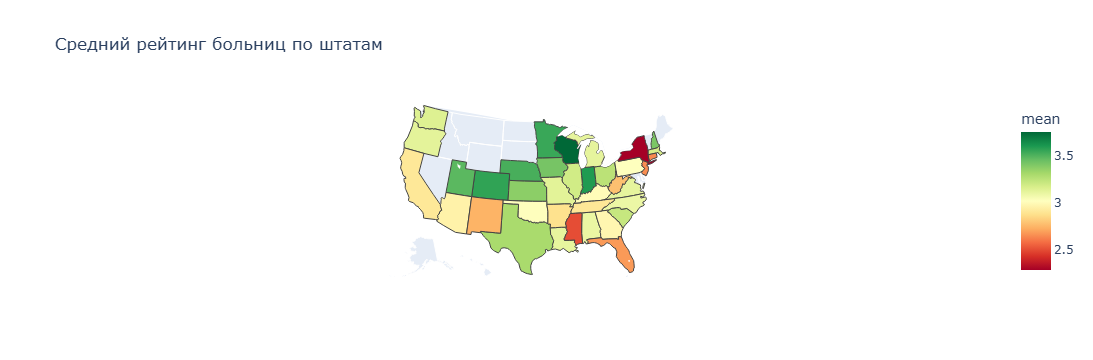

In [114]:
fig = px.choropleth(
    state_ratings,
    locations='state',
    locationmode='USA-states',
    color='mean',
    scope='usa',
    title='Средний рейтинг больниц по штатам',
    color_continuous_scale='RdYlGn'
)
fig.show()

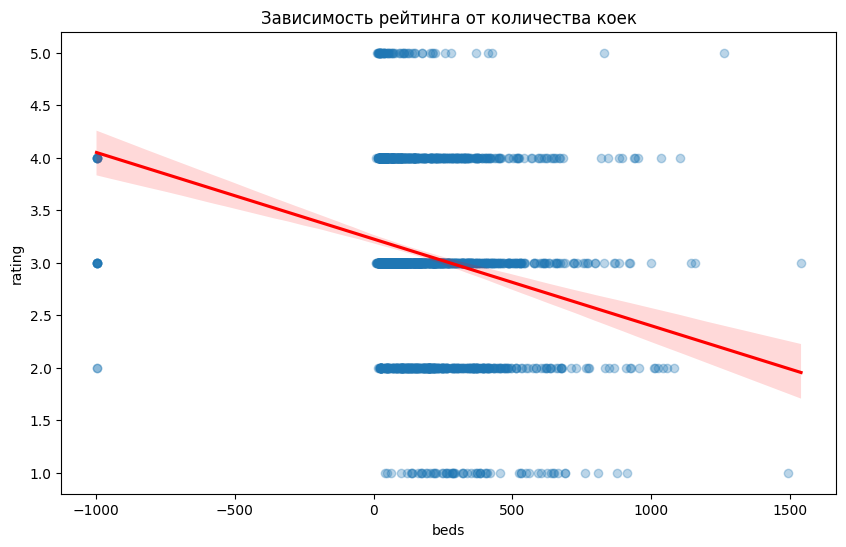

In [137]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clear, x='beds', y='rating', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Зависимость рейтинга от количества коек')
plt.show()

In [122]:
df_clear[['rating', 'beds']].corr()

,rating,beds
rating,1.000000,-0.217968
beds,-0.217968,1.000000


In [ ]:
# r = -0.21 - слабая отрицательная связь

In [145]:
bins=[0, 50, 200, 500, 5000]
df_clear['bed_category'] = pd.cut(df_clear['beds'], 
                                  bins=bins,
                                  labels=['Малые (≤50)', 'Средние (51-200)', 
                                          'Крупные (201-500)', 'Очень крупные (>500)'])


df_clear.groupby('bed_category').agg({
    'rating': 'mean',
    'emergency_services': lambda x: (x==True).mean() * 100
})

C:\Users\Игорь\AppData\Local\Temp\ipykernel_1704\2880125301.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Игорь\AppData\Local\Temp\ipykernel_1704\2880125301.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,rating,emergency_services
bed_category,,
Малые (≤50),3.371859,94.137353
Средние (51-200),3.081515,96.785304
Крупные (201-500),2.873311,98.817568
Очень крупные (>500),2.707792,100.000000


In [131]:
df_clear.groupby('emergency_services')['rating'].agg(['mean', 'count', 'std'])

,mean,count,std
emergency_services,,,
False,3.871429,70,1.048414
True,3.054142,2161,0.796016


In [139]:
df_clear.groupby('owner').emergency_services.value_counts()

owner        emergency_services
Government   True                   425
             False                   10
Physician    False                   11
             True                     7
Proprietary  True                   429
             False                   23
Tribal       True                     1
Voluntary    True                  1299
             False                   26
Name: count, dtype: int64

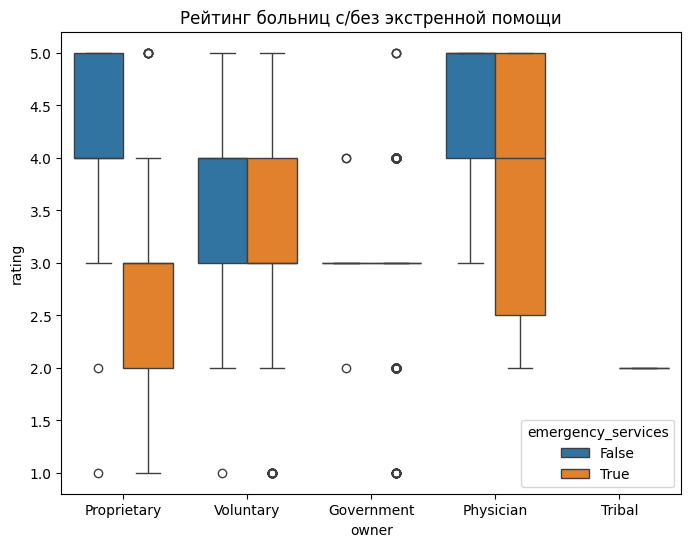

In [140]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clear, x='owner', y='rating', hue='emergency_services')
plt.title('Рейтинг больниц с/без экстренной помощи')
plt.show()

In [148]:
df_clear.groupby(['owner', 'bed_category']).emergency_services.value_counts().unstack()

C:\Users\Игорь\AppData\Local\Temp\ipykernel_1704\3449439974.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



emergency_services                False  True 
owner       bed_category                      
Government  Малые (≤50)               4    165
            Средние (51-200)          6    158
            Крупные (201-500)         0     72
            Очень крупные (>500)      0     28
Physician   Малые (≤50)              11      4
            Средние (51-200)          0      1
            Крупные (201-500)         0      2
            Очень крупные (>500)      0      0
Proprietary Малые (≤50)              14     64
            Средние (51-200)          8    213
            Крупные (201-500)         1    138
            Очень крупные (>500)      0     12
Tribal      Малые (≤50)               0      0
            Средние (51-200)          0      1
            Крупные (201-500)         0      0
            Очень крупные (>500)      0      0
Voluntary   Малые (≤50)               6    329
            Средние (51-200)         14    470
            Крупные (201-500)         6    373
            Очень крупные (>500)      0    114

In [ ]:
#Специализированные небольшие больницы (≤50 коек) имеют более высокие рейтинги, чем крупные многопрофильные госпитали с полным спектром экстренных услуг, что отражает разную сложность пациентов и специфику их работы.

In [150]:
df_clear.to_csv('hospitals_powerbi.csv', index=False, encoding='utf-8')